In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import missingno as msno
import random

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [19]:
df = pd.read_csv('INPI.csv', sep=';', decimal=',')

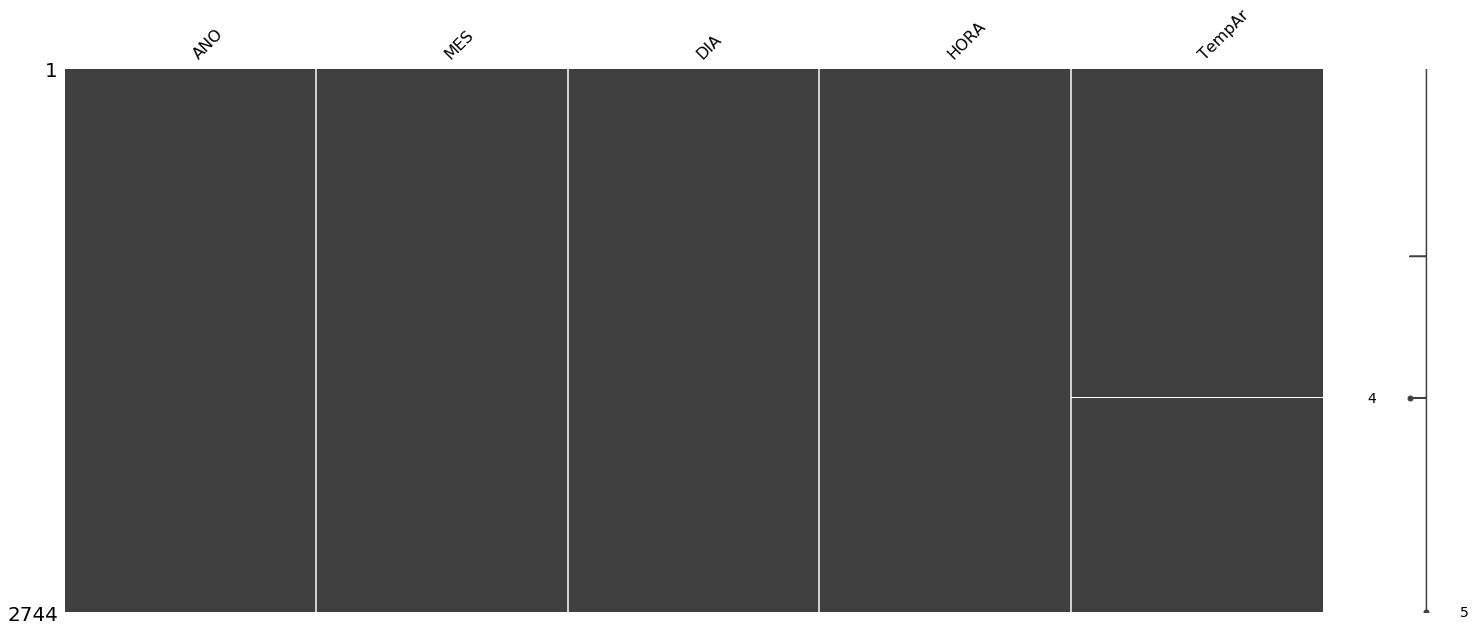

In [20]:
msno.matrix(df)

In [21]:
def create_plus_3_minus_3_features(df, columns='TempAr'):
    for i in range(1,4):
        t_menos_1 = 'temp_t_{}'.format(i)
        df[t_menos_1] = df[columns].shift(i)
        t_mais_1 = 'temp_tm{}'.format(i)
        df[t_mais_1] = df[columns].shift(-i)

In [22]:
def create_month_hour_features(df, columns='HORA'):
    for i in range(3,22,3):
        desc_h = 'h{}'.format(i*100)
        df[desc_h] = df[columns].apply(lambda x: 1 if x == i*100 else 0)
    for i in range(1,12):
        desc_m = 'm{}'.format(i)
        df[desc_m] = df.MES.apply(lambda x: 1 if x == i else 0)

In [23]:
create_plus_3_minus_3_features(df)
create_month_hour_features(df)
df.head()

,ANO,MES,DIA,HORA,TempAr,temp_t_1,temp_tm1,temp_t_2,temp_tm2,temp_t_3,...,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11
0,2009,1,1,0,26.5,NaN,26.0,NaN,25.5,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2009,1,1,300,26.0,26.5,25.5,NaN,24.5,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2009,1,1,600,25.5,26.0,24.5,26.5,28.0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2009,1,1,900,24.5,25.5,28.0,26.0,30.0,26.5,...,0,0,0,0,0,0,0,0,0,0
4,2009,1,1,1200,28.0,24.5,30.0,25.5,33.5,26.0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df_clean = df.dropna()
features_col = df_clean.columns[5:]
features_col

Index(['temp_t_1', 'temp_tm1', 'temp_t_2', 'temp_tm2', 'temp_t_3', 'temp_tm3',
       'h300', 'h600', 'h900', 'h1200', 'h1500', 'h1800', 'h2100', 'm1', 'm2',
       'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11'],
      dtype='object')

In [82]:
def create_xgb_model(x, y, y_true=None):
    model = xgb.XGBRegressor()
    model.fit(x, y)
    print('Model:', model)
    if y_true:
        print('r2:', r2_score(y_true, model.predict(x)))
    else:
        print('r2:', r2_score(y, model.predict(x)))
    return model

In [83]:
x = df_clean[features_col].values
y = df_clean.TempAr.values.reshape(-1,1)

In [84]:
model = create_xgb_model(x,y)

[02:59:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
r2: 0.8699708876142914


In [123]:
df = pd.read_csv('INPI.csv', sep=';', decimal=',')
df['y'] = df.TempAr
df = df.dropna()
#create_plus_3_minus_3_features(df)
#create_month_hour_features(df)

In [102]:
def lose_data(df, perc=.2, column='TempAr'):
    df_lost = df.copy()
    num_row = int(df.shape[0] * .2)
    for i in range(num_row):
        loc = random.randint(0, df.shape[0]-1)
        df_lost[column].iloc[loc]=np.nan
    return df_lost

In [103]:
df_lost = lose_data(df,perc=.2)

C:\Users\guilh\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


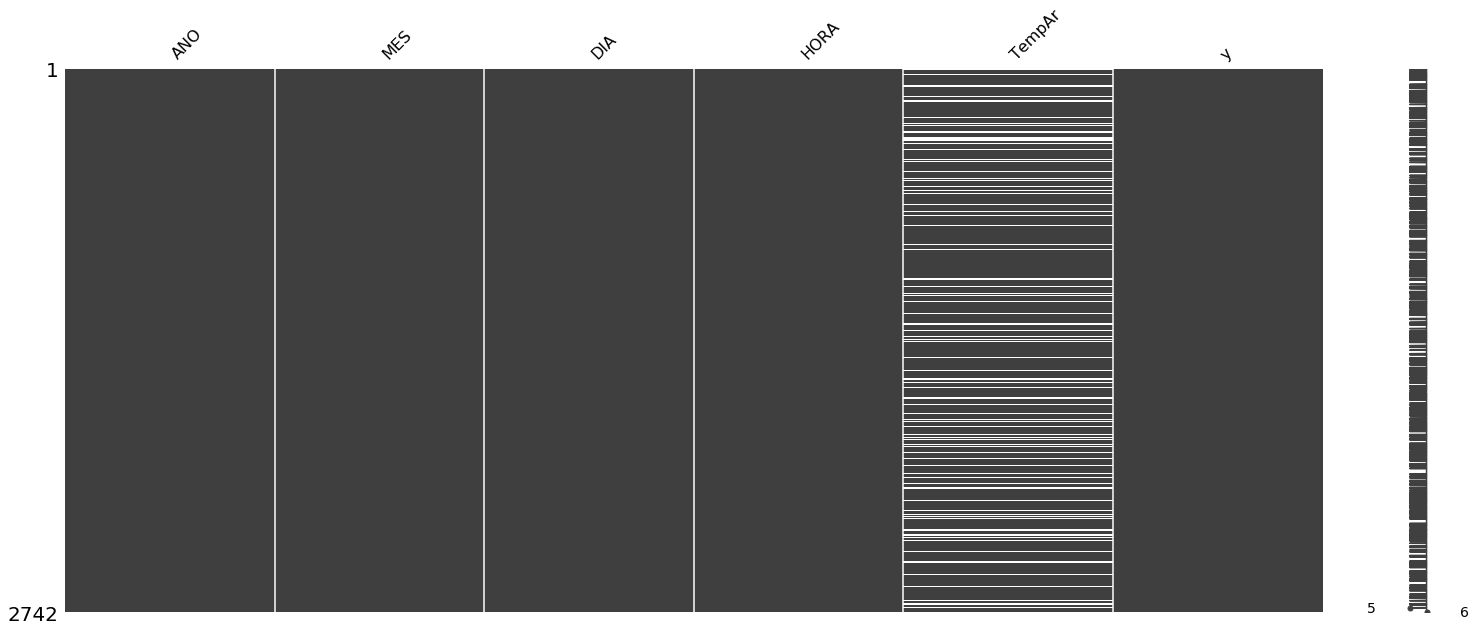

In [104]:
msno.matrix(df_lost)

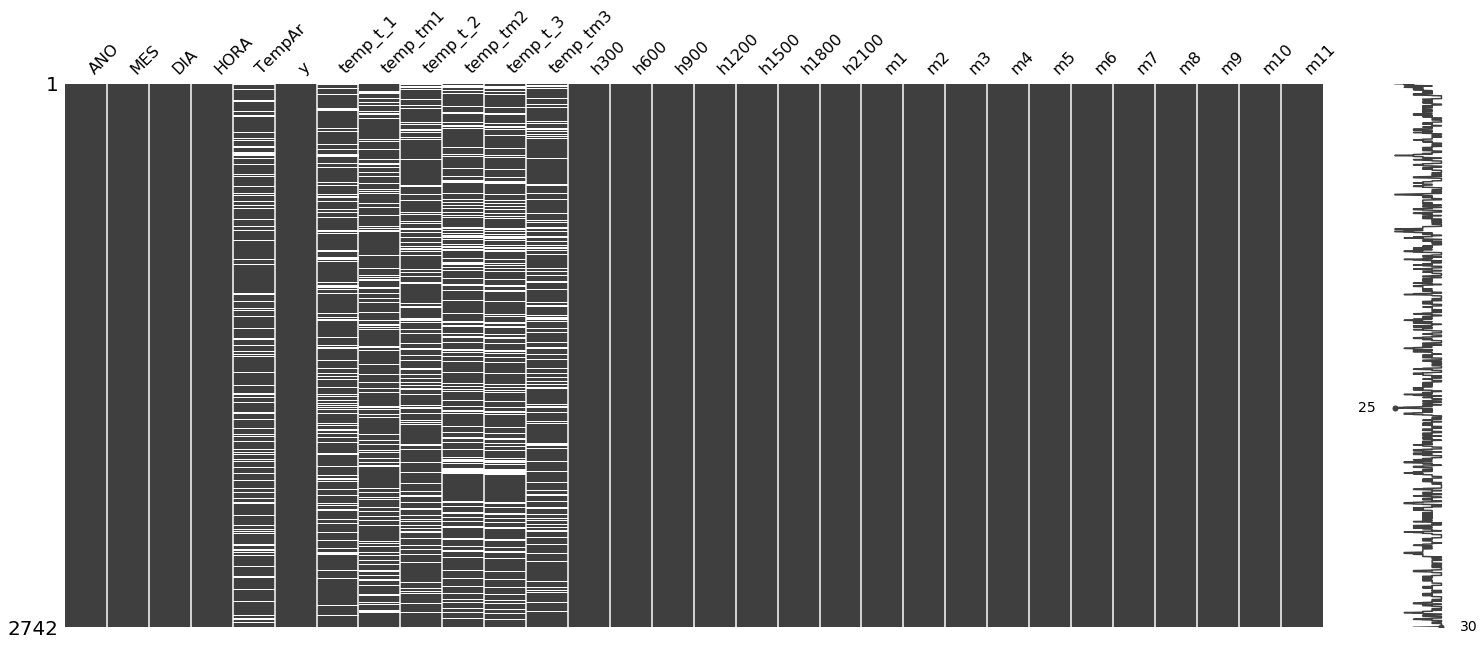

In [105]:
create_plus_3_minus_3_features(df_lost)
create_month_hour_features(df_lost)
msno.matrix(df_lost)

In [106]:
features_col = df_lost.columns[6:]
features_col

Index(['temp_t_1', 'temp_tm1', 'temp_t_2', 'temp_tm2', 'temp_t_3', 'temp_tm3',
       'h300', 'h600', 'h900', 'h1200', 'h1500', 'h1800', 'h2100', 'm1', 'm2',
       'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11'],
      dtype='object')

In [107]:
x1 = df_lost[features_col].values
y1 = df_lost.y.values.reshape(-1,1)
model_lost = create_xgb_model(x1,y1)

[03:02:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
r2: 0.8397944768677121


In [109]:
create_plus_3_minus_3_features(df)
create_month_hour_features(df)
features_col = df.columns[6:]
features_col

Index(['temp_t_1', 'temp_tm1', 'temp_t_2', 'temp_tm2', 'temp_t_3', 'temp_tm3',
       'h300', 'h600', 'h900', 'h1200', 'h1500', 'h1800', 'h2100', 'm1', 'm2',
       'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11'],
      dtype='object')

In [110]:
df_clean = df.dropna()
x_test = df_clean[features_col].values
y_test = df_clean.y.values.reshape(-1,1)
r2_score(y_test, model_lost.predict(x_test))

0.8559688187282389

C:\Users\guilh\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


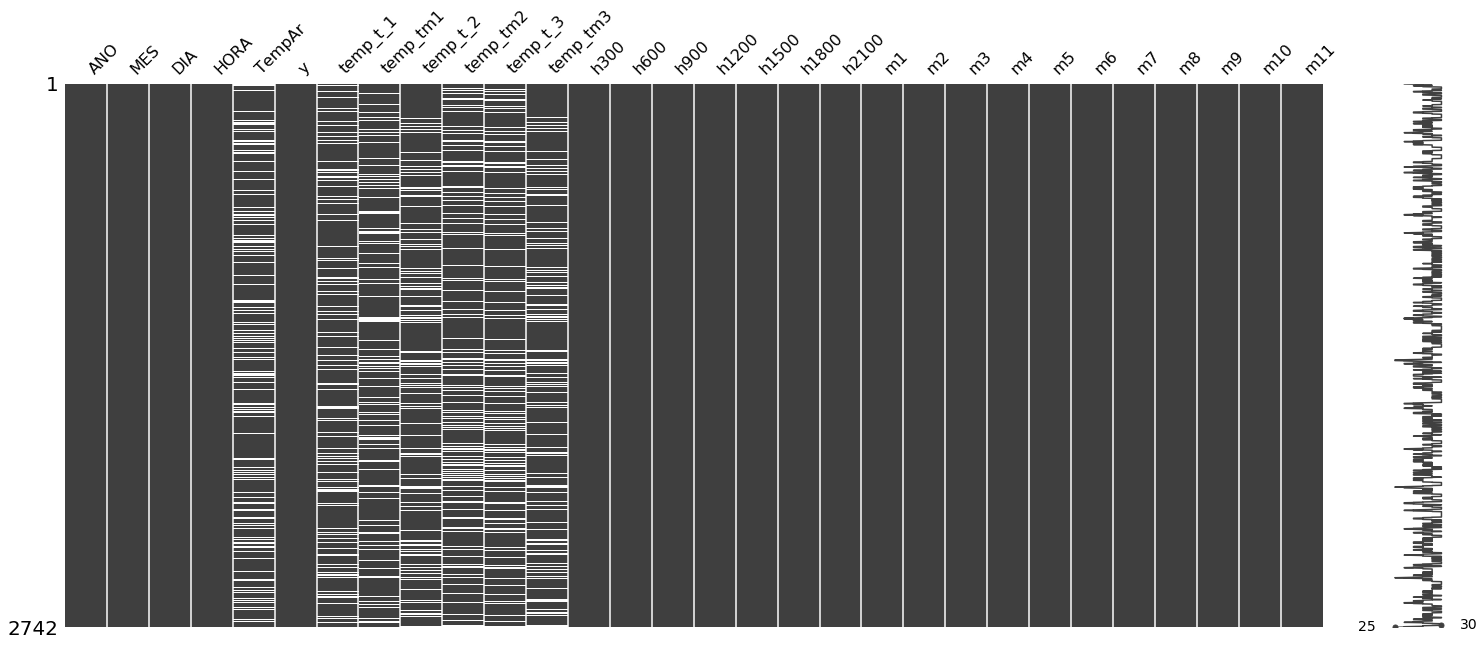

In [124]:
df_lost = lose_data(df,perc=.2)
create_plus_3_minus_3_features(df_lost)
create_month_hour_features(df_lost)
msno.matrix(df_lost)

In [125]:
features_col = df_lost.columns[6:]
features_col

Index(['temp_t_1', 'temp_tm1', 'temp_t_2', 'temp_tm2', 'temp_t_3', 'temp_tm3',
       'h300', 'h600', 'h900', 'h1200', 'h1500', 'h1800', 'h2100', 'm1', 'm2',
       'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11'],
      dtype='object')

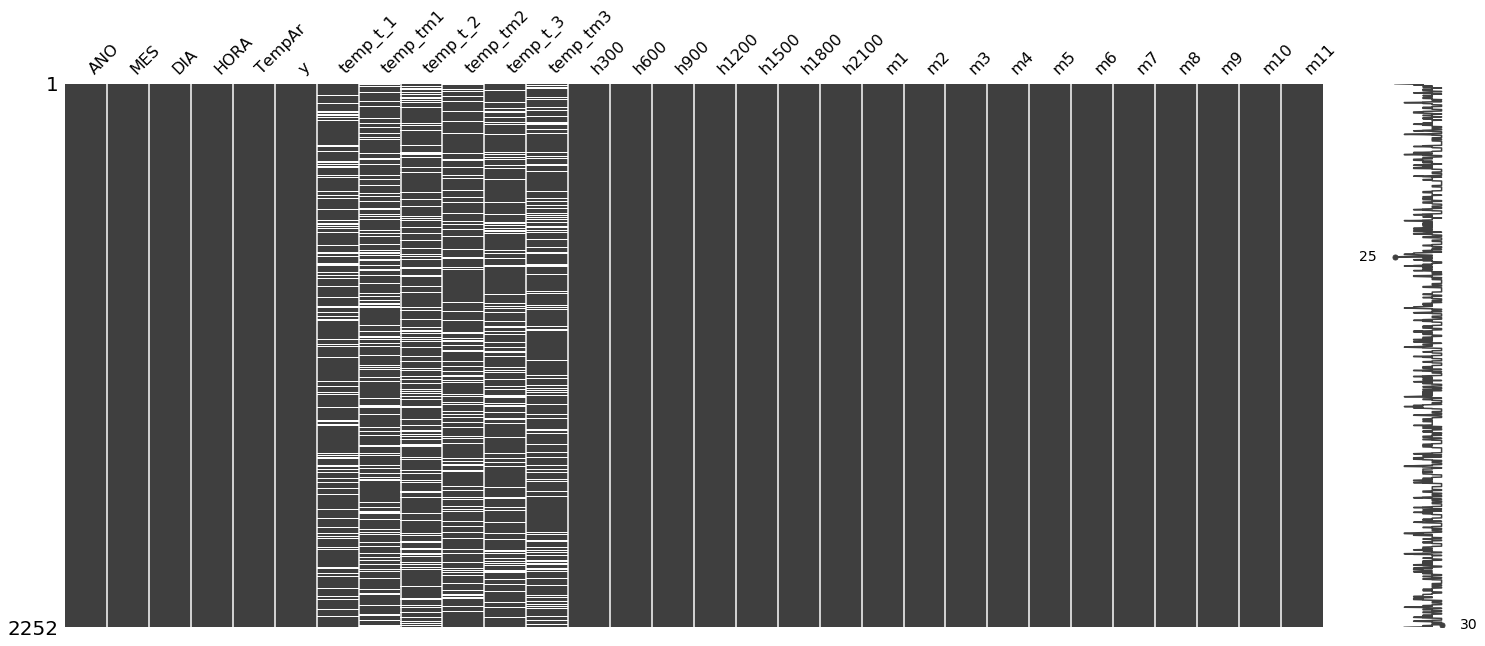

In [118]:
df_lost_train = df_lost.dropna(subset=['TempAr'])
msno.matrix(df_lost_train)

In [126]:
x1 = df_lost_train[features_col].values
y1 = df_lost_train.y.values.reshape(-1,1)
model_lost2 = create_xgb_model(x1,y1)

[03:16:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
r2: 0.84082783920097


In [127]:
x_test = df_lost[features_col].values
y_test = df_lost.y.values
r2_score(y_test, model_lost2.predict(x_test))

0.814377007516494